In [1]:
###                                    UNDERSTANDING BOSTON AIRBNB DATA                                                      ###

In [2]:
# In the following lines we are going to analyze the publicly available dataset of Airbnb for the city of Boston.
# The insights provided can be used from both the hosts and the visitors of the city in order to make well informed decisions.
# Moreover, we will try to use a machine learning model so as to predict the price of airbnb listings by utilizing the available
# features of each accommodation
# This notebook is divided into 5 main parts: Business Questions, Data Understanding, Data Preparation, Business Insights
# and predictive modeling and evaluation

In [3]:
###                                          1. BUSINESS QUESTIONS                                                           ###

In [4]:
# The main question when searching for accommodation is about the price; 
# what is the price ? or does this house worth the money ?
# So, in this analysis we try to answer the following questions:
# a) what properties of a listing affect its price ?
# b) is the location of a house associated with its price ?
# c) which neighboorhoods of Boston are the most expensive
# d) in which months do we have a peak in Boston's Airbnb market ?
# f) and finally, can we use a model in order to predict a listing's representative price in accordance to its features ?

In [5]:
###                                         2. DATA UNDERSTANDING                                                            ###

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, make_scorer
from sklearn.feature_selection import SelectFromModel
%matplotlib inline
pd.set_option('display.max_rows', 100)

In [4]:
df = pd.read_csv('listings_Boston.csv') 

In [8]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [9]:
print('Our dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))
print('{} of the columns contain null values'.format(df.isnull().any().sum()))

Our dataset has 3585 rows and 95 columns
44 of the columns contain null values


In [10]:
# Now let's take a closer look of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [11]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [5]:
# To begin with, we drop some columns that we know we we are not going to use - there can be multiple reasons for dropping 
# these columns, such as containing only null values or containing URLs or being complicated text/geospatial information 
# that is beyond the scope of this notebook to analyze
columns_to_drop = ['scrape_id','summary','description','neighborhood_overview','experiences_offered','notes','transit','access',
                   'country','host_response_time','interaction','host_name','country_code','space','interaction',
                   'host_location','smart_location','listing_url','picture_url','xl_picture_url','thumbnail_url','host_url',
                   'house_rules','medium_url','host_thumbnail_url','host_about','host_picture_url', 'zipcode','latitude',
                    'longitude', 'amenities']
df = df.drop(columns=columns_to_drop, axis=1)

In [6]:
# we also need to check and remove duplicate rows and columns
#   remove duplicated columns
duplicate_columns = []
c = df.columns
for i in range(len(c) - 1):
    v = df[c[i]].values
    for j in range(i + 1, len(c)):
        if np.array_equal(v, df[c[j]].values):
            duplicate_columns.append(c[j])
print(duplicate_columns)                                       # host_total_listings_count is a duplicate column
df = df.drop(duplicate_columns, axis=1)


#   remove any duplicated rows
df = df.drop_duplicates()

['host_total_listings_count']


In [8]:
### VARIABLES WITH MISSING DATA

# now we need to gather columns with missing data
variables_na = [var for var in df.columns if df[var].isnull().sum() > 0]

# we determine the percentage of missing values and display the result ordered by percentage of missing data
df[variables_na].isnull().mean().sort_values(ascending=False)

has_availability                1.000000
jurisdiction_names              1.000000
license                         1.000000
neighbourhood_group_cleansed    1.000000
square_feet                     0.984379
monthly_price                   0.752301
weekly_price                    0.751185
security_deposit                0.625662
cleaning_fee                    0.308787
review_scores_accuracy          0.229568
review_scores_location          0.229289
review_scores_value             0.229010
review_scores_checkin           0.228731
review_scores_cleanliness       0.228173
review_scores_communication     0.228173
review_scores_rating            0.226778
last_review                     0.210879
reviews_per_month               0.210879
first_review                    0.210879
neighbourhood                   0.151464
host_acceptance_rate            0.131381
host_response_rate              0.131381
host_neighbourhood              0.094561
bathrooms                       0.003905
market          

In [9]:
# drop columns with more than 50% null values
variables_na_to_drop = [var for var in variables_na if df[var].isnull().mean() > 0.5]
df = df.drop(columns = variables_na_to_drop, axis=1)

In [10]:
# we also separate the categorical and numerical variables
categorical = [var for var in df.columns if df[var].dtype == 'O']
categorical_na = [var for var in categorical if df[var].isnull().sum() > 0]               # categorical vars with NaNs < 50%
numerical   = [var for var in df.columns if var not in categorical and var != 'price']    # also exclude our response variable
numerical_na  = [var for var in numerical if df[var].isnull().sum() > 0]
print("We have {} categorical variables of which {}  have null values".format(len(categorical), len(categorical_na)))
print("We have {} numerical variables of which {}  have null values".format(len(numerical), len(numerical_na)))

We have 32 categorical variables of which 10  have null values
We have 24 numerical variables of which 11  have null values


In [11]:
###  NUMERICAL VARIABLES

# however, most of the numerical variables are discrete meaning they have a low
# cardinality - such as bathrooms(indicating number of bathrooms in the house), bedrooms, number of beds etc.:
dicrete_numerical = [var for var in numerical if len(df[var].unique()) < 15]
print( dicrete_numerical)

['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']


In [12]:
# we can notice that some columns that contain pricing information need transformation as they are of string type
# and they also contain the dollar sign at the beginning --> 'price', 'cleaning_fee', 'extra_people'
# thus we create a function to clean these features
def clean_prices(df, pricing_columns):
    """
    This function cleans the given columns by removing the first character of the string column and then converting column to float
    Input:
    df : input dataframe
    pricing_columns: (str) columns we want to clean

    Output:
    df : the given dataframe with the transformed column
    """
    for var in pricing_columns:
        df[var] = df[var].map(lambda x: x[1:].replace(",", ''), na_action='ignore')
        df[var] = df[var].astype(float)

    return df


pricing_cols = ['price', 'cleaning_fee', 'extra_people']
df = clean_prices(df, pricing_cols)

In [13]:
# Now that we have transformed the price variable we can check some of its characteristics
print('Mean listing price {} is dollars'.format(df['price'].mean()))
print('Maximum listing price {} is dollars'.format(df['price'].max()))
print('Minimum listing price {} is dollars'.format(df['price'].min()))

Mean listing price 173.9258019525802 is dollars
Maximum listing price 4000.0 is dollars
Minimum listing price 10.0 is dollars


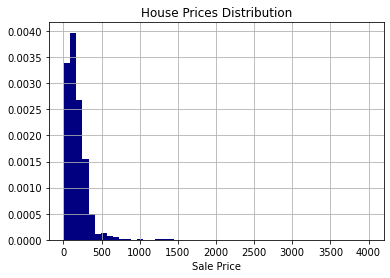

In [14]:
# we can also examine the distribution of our response variable
df['price'].hist(bins=50, density=True, color='navy')
plt.xlabel('Sale Price')
plt.title('House Prices Distribution')
plt.show()

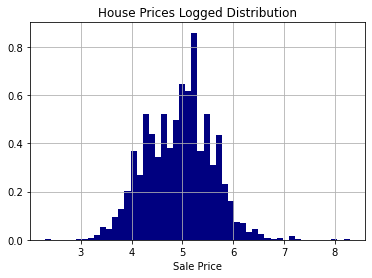

In [15]:
# we can see the distribution has a right skew thus we can check if a log-transform could balance our target variable
np.log(df['price']).hist(bins=50, density=True, color='navy')
plt.xlabel('Sale Price')
plt.title('House Prices Logged Distribution')
plt.show()
# the histogram of logged prices is much more balanced - hence we can test our predictive model by using the log-prices

In [16]:
# In the same way we can examine the distribution of the other continuous independent variables
continuous_numerical = [var for var in numerical if var not in dicrete_numerical]
continuous_numerical.remove('id')
continuous_numerical.remove('host_id')                    # also exclude id and host_id since they do not add any value
print(continuous_numerical)

['host_listings_count', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'calculated_host_listings_count', 'reviews_per_month']


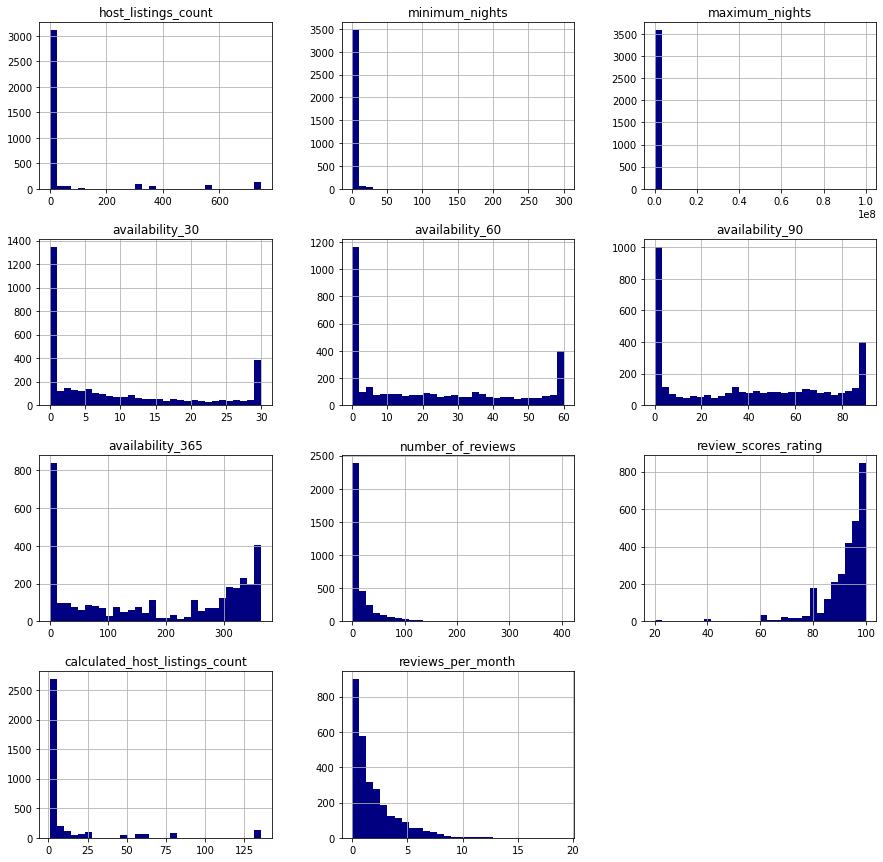

In [23]:
df[continuous_numerical].hist(bins=30, color='navy',figsize=(15,15))
plt.show()

In [24]:
# The variables are not normally distributed. And there are a particular few that are extremely skewed like reviews_per_month,
# review_scores_rating and extra_people.
# Sometimes, transforming the variables to improve the value spread, improves the model performance.
# Many variables though contain zero or negative values, thus we cannot use the log-transform - we could use Yeo - Johnson
# transform for them, which is a power transform that handles both positive and negative values

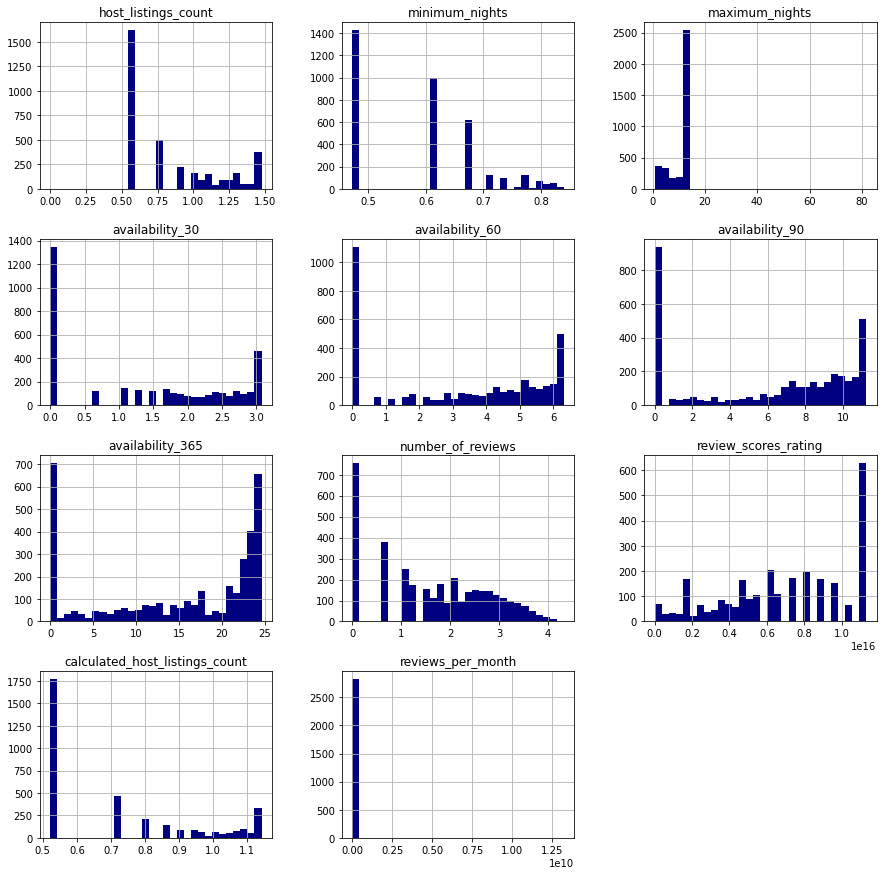

In [25]:
# Let's analyse the distributions of the variables after applying a yeo-johnson transformation
tmp = df.copy()
for var in continuous_numerical:
    # transform the variable - yeo-johsnon
    tmp[var], param = stats.yeojohnson(df[var])

# plot the histograms of the transformed variables
tmp[continuous_numerical].hist(bins=30, color='navy' ,figsize=(15, 15))
plt.show()

In [26]:
# one can notice that the transformation did not really improve the value spread - 
# whether this transformation improves the predictive power, can be examined -->
# to determine if this is the case, one should train a model with the original values
# and one with the transformed values, and determine model performance
# however that exceeds the scope of our analysis and we are going with the original values

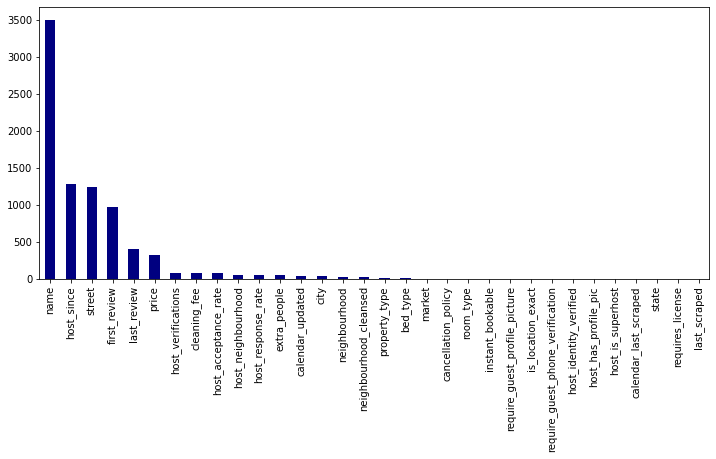

In [17]:
### CATEGORICAL VARIABLES
# Cardinality
# At first, let's evaluate how many different categories are present in each of the variables.
df[categorical].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5), color='navy')

In [28]:
# we can see that many of these variables have  zero cardinality (i.e last_scraped, state)
# meaning that they cannot give us any information or enhance the predictive power of a model - hence we drop them

In [29]:
# we are going to drop last_scraped, state, market, calendar_last_scraped, requires_license variables as their cardinality is insignificant
# we also drop the name of the house variable as well as street, host_neighbourhood, neighbourhood and city variables because
# neighbourhood_cleansed variable contains enough information for our analysis - going deeper to more fine-grained street name
# information and geolocation data is not in the scope of this analysis

In [18]:
drop_zero_cardinality = ['last_scraped', 'state','market','calendar_last_scraped', 'requires_license', 
                          'name','street','host_neighbourhood','neighbourhood','city']     

In [19]:
categorical = list(set(categorical) - set(drop_zero_cardinality))
print('Now we have {} categorical variables'.format(len(categorical)))

Now we have 22 categorical variables


In [20]:
df = df.drop(columns = drop_zero_cardinality, axis=1 )

In [33]:
###                                         3. DATA PREPARATION                                                              ###

In [21]:
# Firstly,  we need to handle the missing values
# we also separate the categorical and numerical variables
categorical = [var for var in df.columns if df[var].dtype == 'O']
categorical_na = [var for var in categorical if df[var].isnull().sum() > 0]               
numerical   = [var for var in df.columns if var not in categorical and var != 'price']    
numerical_na  = [var for var in numerical if df[var].isnull().sum() > 0]

In [22]:
# we have 11 discrete numerical values that most of them contain null values
# we will not fill these NAs with the mean value  since it does not make sense
# we will use the mode of the column instead - for the rest of the numerical columns the mean will be fine
for var in dicrete_numerical:
    mode = df[var].mode()[0]
    df[var] = df[var].fillna(mode)

In [23]:
# now we replace missing values of continuous numerical variables with the mean value of the column
for var in list(set(numerical_na) - set(dicrete_numerical)):
    df[var] = df[var].fillna(df[var].mean())


# and replace missing values of categorical features with the mode of the column
for var in categorical_na:
    mode = df[var].mode()[0]
    df[var] = df[var].fillna(mode)

In [24]:
print('Our dataset now contains {} rows and {} columns'.format(df.shape[0]-1, df.shape[1]-1))
print('We have {} numerical features and {} categorical features and the response variable'.format(len(numerical), len(categorical)))

Our dataset now contains 3584 rows and 45 columns
We have 26 numerical features and 19 categorical features and the response variable


In [38]:
# If we want to use these 19 categorical features in a machine learning model we need to turn them into numerical features
# as we know that ML algorithms work with numerical data - To do so, we need to understand the context of each variable
# so as to apply a proper encoding:


# We have variables (require_guest_profile_picture, require_guest_phone_verification, host_identity_verified, instant_bookable, 
#                   is_location_exact,host_is_superhost) that contain  True/False values,  hence we can enncode them with 0/1 


# We have variables (host_response_rate, host_acceptance_rate) that are percentages, so we are going to turn them into 
# actual numbers


# Some other variables (room_type, property_type, bed_type, cancellation_policy) just need a typical encoding
# We have a location feature(neighbourhood_cleansed) that is also going to be typically encoded


# Date variables(first_review, host_since, last_review) are usually turned into differences by subtracting the recorded date
# from the present date. However, this analysis is conducted in 2022 while our data date back to 2010-2016 and producing such 
# date differences seems useless. Instead, we are going to assign points to each recorded date, giving max points to the latest 
# date and giving 0 points to the earliest date (point range will be the number of days from earliest to latest date)


# We drop the (calendar_updated, host_verifications) variables since they contain  information with complicated text characters 
# and the analysis of such data is beyond the scope of this analysis

In [25]:
drop = ['calendar_updated', 'host_verifications']
df = df.drop(columns = drop, axis=1)

In [26]:
# encode false/true values to 0/1
for var in ['require_guest_profile_picture', 'require_guest_phone_verification', 'host_identity_verified', 
            'instant_bookable', 'is_location_exact', 'host_is_superhost']:
    
    df[var] = df[var].apply(lambda x : 1 if x=='t' else 0)

In [27]:
# convert string percentages(i.e. '95%'') to integer numbers
for var in ['host_acceptance_rate', 'host_response_rate']:
    df[var] = df[var].apply(lambda x: x.replace('%', ''))
    df[var] = pd.to_numeric(df[var])

In [28]:
# Now we are going to turn date information to scores - the latest the date the more points it will be assigned
def score_dates(df , date_column):
    """
    This function assigns score points to dates; the closer the date to the latest date the more points it gets
    
    Input:
    df : input dataframe
    date_column: (str) column that contains the date information in string format

    Output:
    df : the given dataframe with the transformed column having also dropped the initial date column
    """
        
    max = pd.to_datetime(df[date_column].max(), format="%Y-%m-%d")
    min = pd.to_datetime(df[date_column].min(), format="%Y-%m-%d")
    
    max_days = (max-min).days
    df[date_column + '_points'] = df[date_column].apply(lambda x : max_days - (max - pd.to_datetime(x, format="%Y-%m-%d")).days)
    
    df.drop(date_column, axis=1, inplace=True)
                                                       
    return df

In [29]:
df = score_dates(df , 'last_review')
df = score_dates(df , 'host_since')
df = score_dates(df , 'first_review')

In [30]:
df.shape                                           # 44 features left

(3585, 44)

In [45]:
# for the scope of our analysis we also need to use the calendar.csv dataset in order to get the listings' availability/booking 
# information - luckily this dataset is quite small and needs much less data wranglling

In [46]:
calendar = pd.read_csv('calendar_Boston.csv')

In [47]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [48]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [49]:
# we can see that the calendar dataframe has many null values in the price columns - let's see the reason for this

In [50]:
calendar[calendar.available=='f'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665853 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  665853 non-null  int64 
 1   date        665853 non-null  object
 2   available   665853 non-null  object
 3   price       0 non-null       object
dtypes: int64(1), object(3)
memory usage: 25.4+ MB


In [51]:
calendar[calendar.available=='t'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643037 entries, 365 to 1308879
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  643037 non-null  int64 
 1   date        643037 non-null  object
 2   available   643037 non-null  object
 3   price       643037 non-null  object
dtypes: int64(1), object(3)
memory usage: 24.5+ MB


In [52]:
# so we can see that we have prices only for the dates when the listing is available

In [53]:
#  we surely need to drop duplicate values
calendar = calendar.drop_duplicates()

In [54]:
calendar.shape

(1308525, 4)

In [55]:
# now we clean the price column
calendar = clean_prices(calendar, ['price'])

In [56]:
calendar['available'] = calendar['available'] .apply(lambda x : 1 if x=='t' else 0)

In [57]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['year'] = calendar['date'].dt.year
calendar['month'] = calendar['date'].dt.month
# also rename the month column for better readability
calendar['month'] = calendar['month'].replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'Septempber',
                                               10:'October', 11:'November', 12:'December'})

In [58]:
# we separate the dataset to two - one for the available listings and one for the booked ones
calendar_booked = calendar[calendar.available ==0]        
calendar_available = calendar.dropna(subset = ['price'], axis=0)

In [59]:
###                                         4. BUSINESS UNDERSTANDING                                                        ###

In [60]:
# Now that we have transformed our data we can try and get a good understanding of Airbnb market in Boston by checking the 
# relationships of independent variables with price as well as the calendar's information

In [31]:
categorical = [var for var in df.columns if df[var].dtype == 'O']            
numerical   = [var for var in df.columns if var not in categorical and var != 'price']   

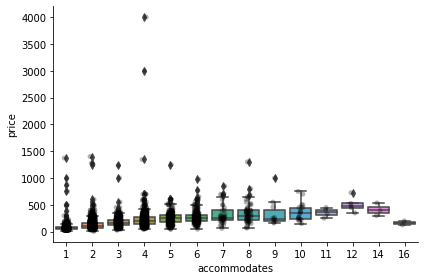

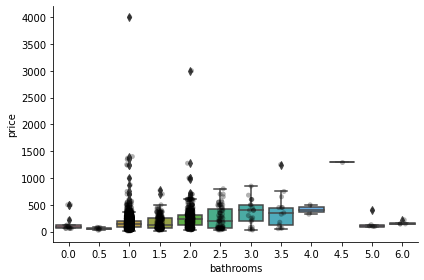

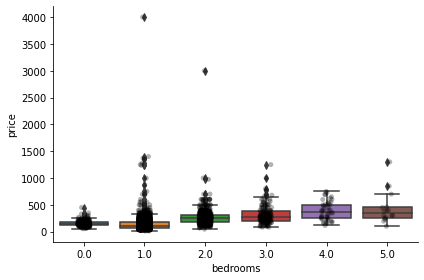

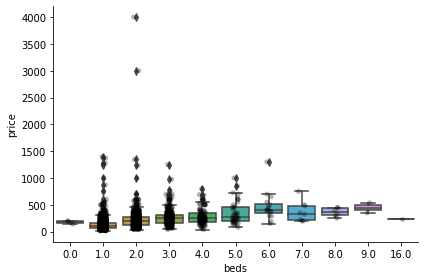

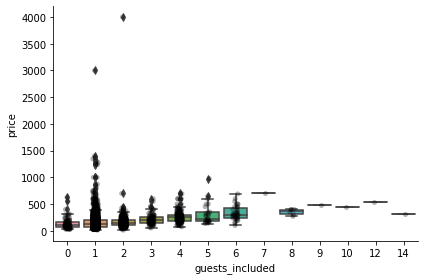

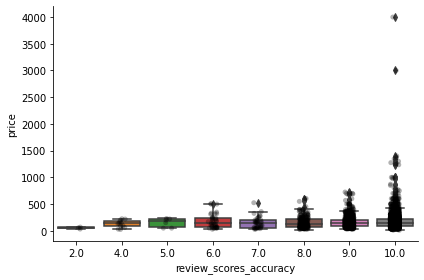

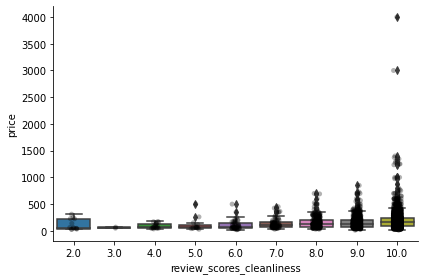

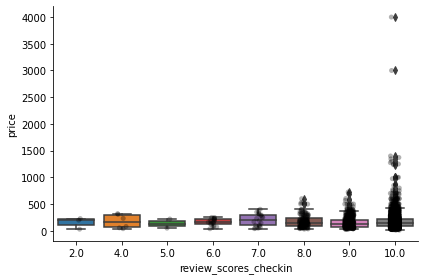

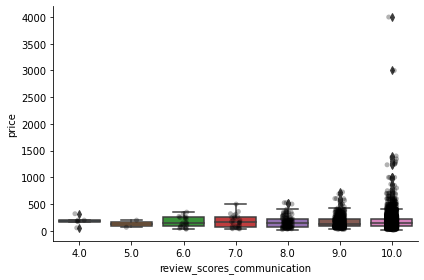

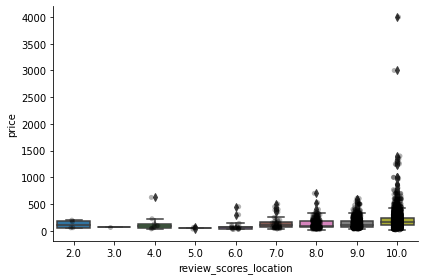

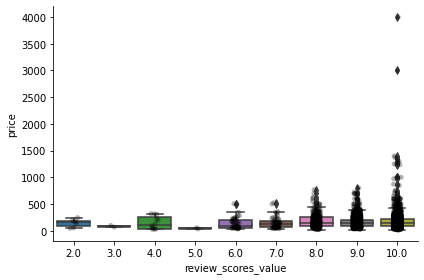

In [62]:
### DISCRETE NUMERICAL VARIABLES

# we can visualize the contribution of discrete variables to the house price
# a nice way to do so is by using boxplots
for var in dicrete_numerical:
    

    # make boxplot with Catplot
    sns.catplot(x=var, y='price', data=df, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='price', data=df, jitter=0.1, alpha=0.3, color='k')
    plt.show()

In [63]:
# from the produced boxplots we can see that especially the number of bedrooms, bathrooms, guests included as well as
# the location score from the reviews might affect the price of the house

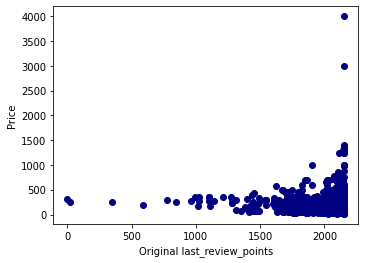

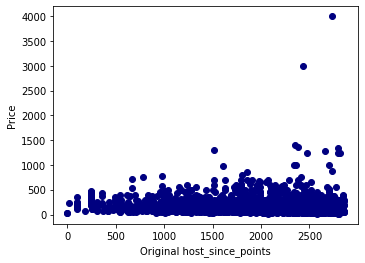

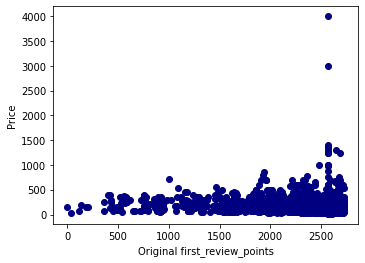

In [64]:
### NUMERICAL VARIABLES
# now lets see if there is any correlation between tha newly created date-point columns and the price of the house
for var in ['last_review_points','host_since_points','first_review_points']:
    plt.figure(figsize=(12, 4))

    # plot the original variable vs sale price
    plt.subplot(1, 2, 1)
    plt.scatter(df[var], df['price'], color='navy')
    plt.ylabel('Price')
    plt.xlabel('Original ' + var)
    
    plt.show()

In [65]:
# It's hard to tell from the avove diagrams if there is a slight correlation between the variables and the response

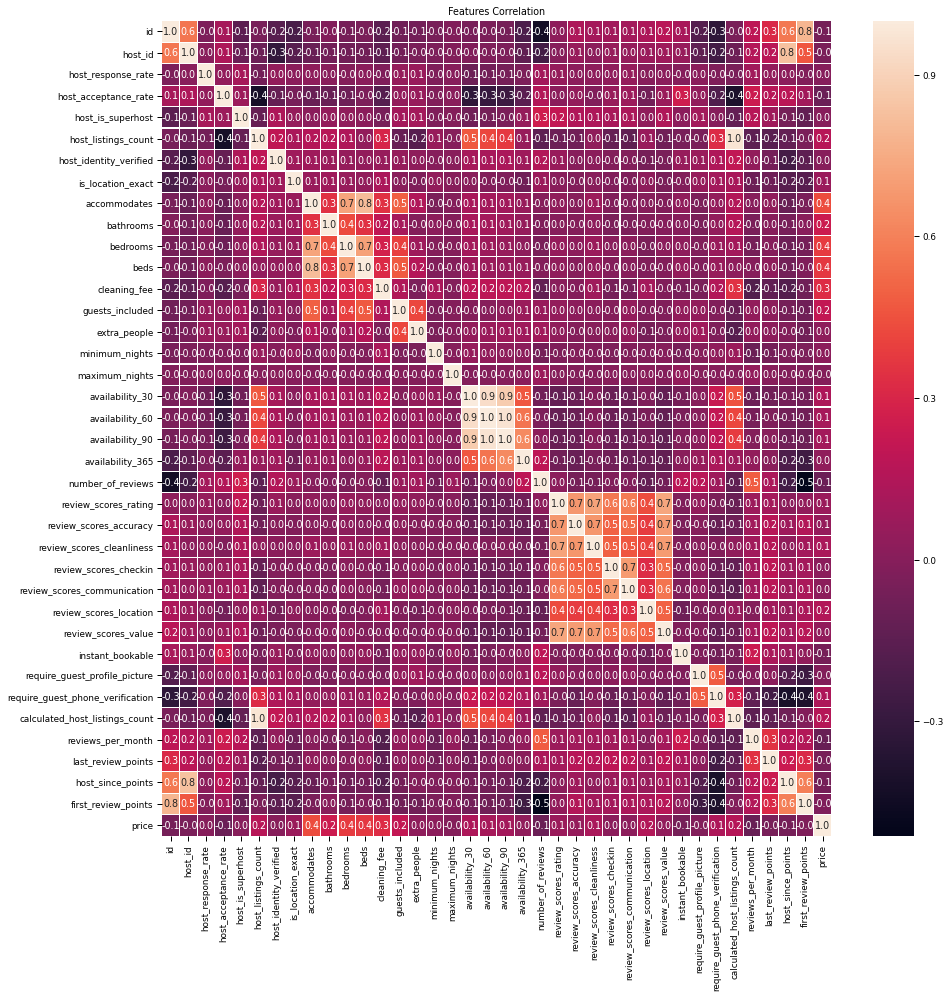

In [35]:
### NUMERICAL VARIABLES
# let's see the correlation between the numerical variables and the price
cor_variables = numerical + ['price']
fig = plt.figure(figsize= (15,15))
sns.set_context("paper", font_scale=1.)
sns.heatmap(df[cor_variables].corr(),  annot=True,  linewidths=.2, fmt= '.1f')
plt.title("Features Correlation"); 

In [67]:
# we can easily see there is a noticeabe correlation between price and the variables accomodates, bathrooms, bedrooms, beds,
# cleaning fee, guests_included and host_listing_count (ranging from 0.2 to 0.4) - as we have also seen in the previous
# boxplots

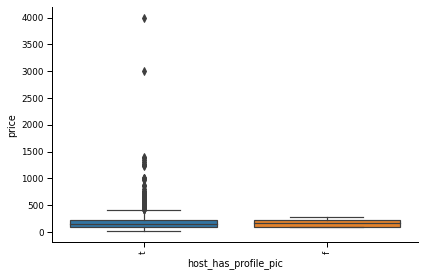

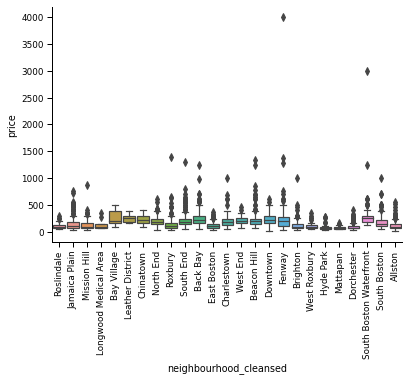

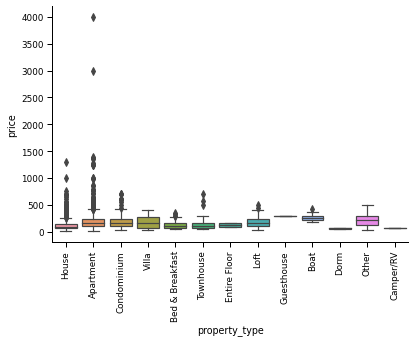

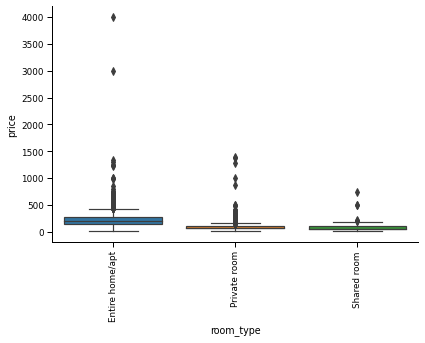

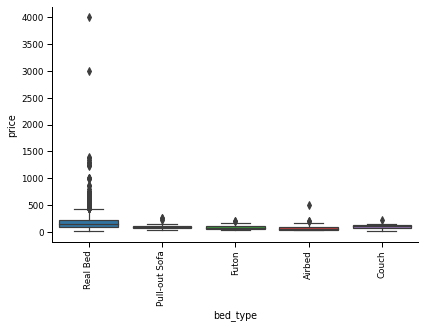

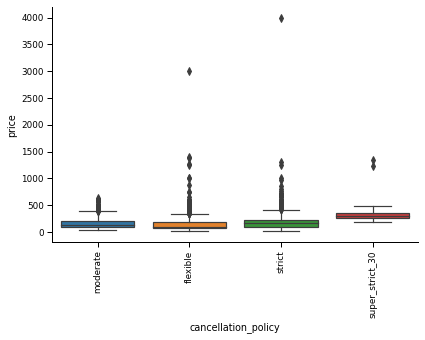

In [68]:
### CATEGORICAL VARIABLES
# now let's examine the distribution of categorical variables values along with house price
for var in categorical:

    # make boxplot with Catplot
    sns.catplot(x=var, y='price', data=df, kind="box", height=4, aspect=1.5)
    plt.xticks(rotation=90)
    plt.show()

In [69]:
#  We can see that prices vary depending on the neighboorhood of the house, i.e. Bay Village, Back Bay, South Boston Waterfront
#  have more expensive houses
#  Additionally, as expected, property type and room type have an impact on price as we can observe that entire home/appartment
#  type of accomodation is more expensive than a private room or shared room
#  Moreover, real beds cost more as we can see in the bed_type boxplot
#  Regarding cancellation policy one can notice that cheaper listings usually have moderate cancellation policy while the more
#  high-end listings have a super_strict policy

In [70]:
# Apart from the boxplots we an use cumulative statistics to get a better understanding of the AirBnB market in Boston

Text(0.5, 0, 'Neighborhood')

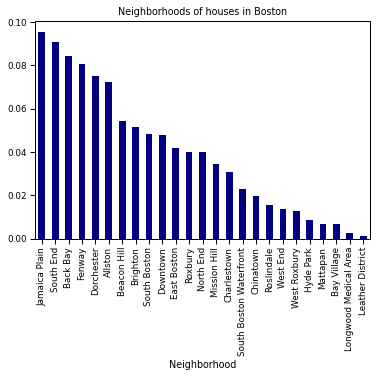

In [71]:
neighborhood = df.neighbourhood_cleansed.value_counts()
(neighborhood / df.shape[0]).plot(kind = 'bar', color='navy')
plt.title('Neighborhoods of houses in Boston')
plt.xlabel('Neighborhood')

Text(0.5, 0, 'Room type')

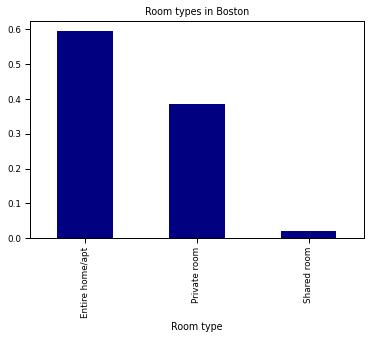

In [72]:
room_types = df.room_type.value_counts()
(room_types / df.shape[0]).plot(kind = 'bar', color='navy')
plt.title('Room types in Boston')
plt.xlabel('Room type')

Text(0.5, 0, 'Cancellation type')

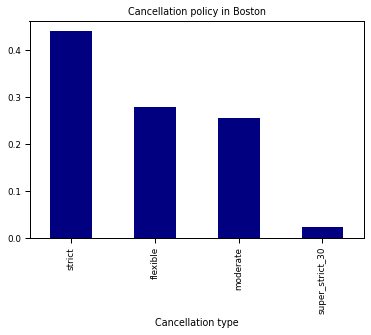

In [73]:
cancel_policy = df.cancellation_policy.value_counts()
(cancel_policy / df.shape[0]).plot(kind = 'bar', color='navy')
plt.title('Cancellation policy in Boston')
plt.xlabel('Cancellation type')

Text(0.5, 0, 'Is superhost')

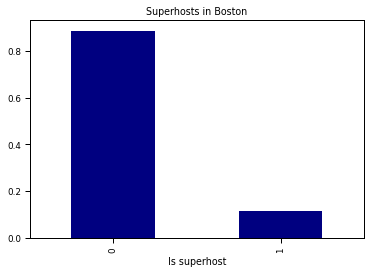

In [74]:
superhosts = df.host_is_superhost.value_counts()
(superhosts / df.shape[0]).plot(kind = 'bar', color='navy')
plt.title('Superhosts in Boston')
plt.xlabel('Is superhost')

In [75]:
# When observing the barplots we can see the neighborhoods with the most AirBnB listings - with Jamaica Plain in the first place
# and Leather District in the last

# In addition, entire home or appartment is the most common type of listing accounting for approximately 60 % while private 
# rooms amounts for 38% and only a few of the listings are shared rooms (2-3 %)

# As far as the cancellation policy is concerned, most listings have a strict policy whereas flexible and moderate policies 
# account for almost the same percentage and only a small fraction of the hosts require a super strict cancellation policy

# Lastly, only 12 % of the hosts are superhosts in Boston and it would be really interesting to see the possible impact of
# this variable in a predictive model

In [76]:
#       Now let's use the calendar datasets to see if we can extract any meaningful insights    

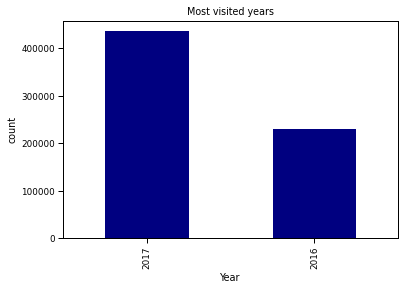

In [77]:
calendar_booked.year.value_counts().plot(kind = 'bar', color='navy')
plt.title('Most visited years')
plt.xlabel('Year')
plt.ylabel('count');

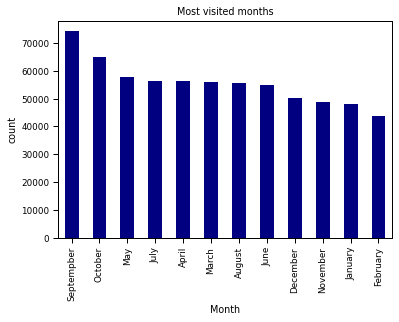

In [78]:
calendar_booked.month.value_counts().plot(kind = 'bar', color='navy')
plt.title('Most visited months')
plt.xlabel('Month')
plt.ylabel('count');

In [79]:
# By observing the diagrams of booked listings we can understand the increase in the market from 2016 to 2017 as well as
# notice that September is the 'hottest' month for Boston with October being in the second place while January and February seems
# to be the least popular months

In [80]:
calendar_booked = calendar_booked.merge(df.loc[:,['id','neighbourhood_cleansed']], how='inner', left_on='listing_id', 
                                        right_on='id').drop('id',axis=1)

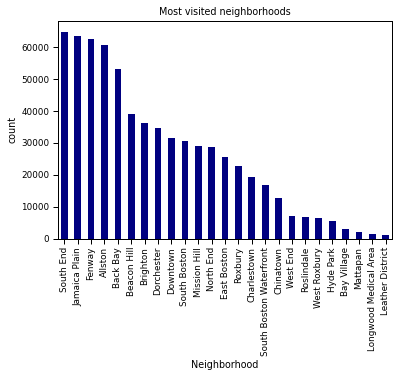

In [81]:
calendar_booked.neighbourhood_cleansed.value_counts().plot(kind = 'bar', color='navy')
plt.title('Most visited neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('count');

In [82]:
# In the above plot, one can notice the most popular neighborhoods of Boston according to the calendar dataset
# South End, Jamaica Plain and Fenway are the top booked neighboorhoods and on the other hand Mattapan, Longwood Medical Area
# and Leather District have the fewer bookings in absolute numbers

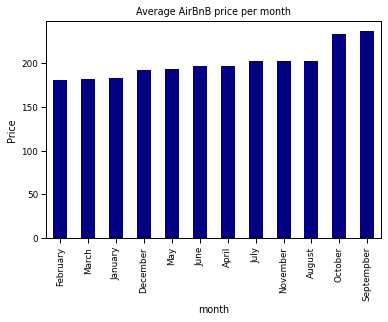

In [83]:
calendar_available.groupby('month')['price'].mean().sort_values().plot(kind = 'bar', color='navy')
plt.title('Average AirBnB price per month')
plt.ylabel('Price');

In [84]:
# From the available prices we can observe the laws of the market - higher demand results to increased prices
# September and October have the highest average price (approximately 235 dollars) which makes sense because demand in Boston
# peaks during these months. Additionally, in February you can find the cheapest accomodation

In [85]:
calendar_available = calendar_available.merge(df.loc[:,['id','neighbourhood_cleansed']], how='inner', left_on='listing_id', 
                                        right_on='id').drop('id',axis=1)

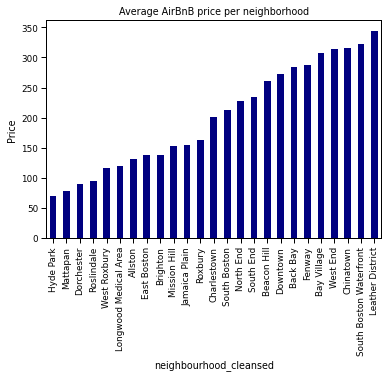

In [86]:
calendar_available.groupby('neighbourhood_cleansed')['price'].mean().sort_values().plot(kind = 'bar', color='navy')
plt.title('Average AirBnB price per neighborhood')
plt.ylabel('Price');

In [87]:
# Diving deeper, we can see the average price per neighboorhood taken from the available calendar data
# Leather District and South Boston Waterfront have the most expensive listings whereas Hyde Park and Mattapan have the lowest
# average price

In [88]:
# Generally, some important key takeaways are:
# a) the room type heavily matters as expected; a whole apartment is going to be more expensive than a 
#    private room
# b) comfort is also really important as we can see that the number of bathrooms and bedrooms as well as the number of people
#    that can be accommodated may influence the price of the listing
# c) the location of the listing can also affect the price
# d) seasonality is also a crucial factor that affects Airbnb pricing

In [89]:
###                                         5. MODELING & EVALUATION                                                         ###

In [90]:
# Now we are going to use a Random Forest Regressor in order to try to predict listings' prices from the explanatory 
# variables we are exploring so far - the algorithm is also going to give us feature importances that depict which features
# have the biggest impact when trying to predict rental prices

In [91]:
df = df.drop(columns = ['id','host_id'], axis=1)       # lastly drop ID columns 

In [92]:
categorical = [var for var in df.columns if df[var].dtype == 'O']
numerical   = [var for var in df.columns if var not in categorical and var != 'price']
print("We have {} numerical and {} categorical variables".format(len(numerical), len(categorical)))

We have 35 numerical and 6 categorical variables


In [93]:
df.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'price', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'reviews_per_month',
       'last_review_points', 'host_since_points', 'first_review_points'],
      dtype=

In [94]:
# Before training a predictive model we need  to split our data into training and  testing datasets 
# and encode our categorical features 

In [95]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.15, random_state=33)

In [96]:
label_encoders = {}
for var in df[categorical].columns:
    label_encoders[var] = LabelEncoder()
    label_encoders[var].fit(X_train[var])
    X_train[var] = label_encoders[var].transform(X_train[var])
    X_test[var] = label_encoders[var].transform(X_test[var])

In [97]:
# we also log-transform our response variables in order to balance the distribution of its values
y_train = np.log(y_train)

In [98]:
rf = RandomForestRegressor(random_state=33)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [99]:
print('R-squared of the model is {}'.format(r2_score( y_test, np.exp(predictions))))
print('Mean Absolute Error of the model is {}'.format(mean_absolute_error( y_test,np.exp(predictions))))

R-squared of the model is 0.6286294888771731
Mean Absolute Error of the model is 40.929832609454444


In [100]:
# So, the random forest regressor gives us a mean absolute error of 40,9 dollars while it can explain 62,8% of the variance(R^2)
# without any hyperparameter tuning.
# Now, we are going to use grid search hyperparameter optimization combined with cross-validation in order to enhance our
# model's performance as well as obtain more robust result's

In [101]:
param_grid = dict(
              criterion = ['squared_error','absolute_error'],
              n_estimators = [100,200,300],
              max_depth = [20,30,50],
              min_samples_leaf = [1,2]                          
              )

In [102]:
gs = GridSearchCV(RandomForestRegressor(random_state=33), param_grid, cv=3)

In [103]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=33),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [20, 30, 50], 'min_samples_leaf': [1, 2],
                         'n_estimators': [100, 200, 300]})

In [104]:
print('Best Parameters found: ', gs.best_params_)
print('Mean CV score of best params: ', gs.best_score_)

Best Parameters found:  {'criterion': 'squared_error', 'max_depth': 30, 'min_samples_leaf': 2, 'n_estimators': 300}
Mean CV score of best params:  0.6664277315612763


In [105]:
# As we can see the best hyperparameters are the squared error criterion, a max depth of 30, 300 estimators and minimum leaf 
# samples equal to 2
rf = RandomForestRegressor(n_estimators=300, max_depth=30, criterion='squared_error', min_samples_leaf=2,random_state=33)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [106]:
print('R-squared of the model is {}'.format(r2_score( y_test, np.exp(predictions))))
print('Mean Absolute Error of the model is {}'.format(mean_absolute_error(y_test,np.exp(predictions))))

R-squared of the model is 0.6191512151445033
Mean Absolute Error of the model is 41.05453514573075


In [107]:
# Using the configuration provided from the hyperparameter tuning process gives us 61,9% R squared and a mean absolute error of
# 41 dollars

In [108]:
# Another great aspect of the random forest algorithm is that it provides us with feature importance - in this way we can
# understand the effect of each variable on the target prediction and propably diagnose problems of our model such as 
# overfitting or bias
importances = rf.feature_importances_
indices     = np.argsort(-importances)
df_imp      = pd.DataFrame(dict(feature = X_train.columns[indices],
                                importance = importances[indices]))
df_imp[:10]

,feature,importance
0,room_type,0.473382
1,bathrooms,0.064216
2,host_since_points,0.047310
3,neighbourhood_cleansed,0.045443
4,accommodates,0.036019
5,cleaning_fee,0.033170
6,availability_365,0.021915
7,minimum_nights,0.019559
8,availability_60,0.016759
9,bedrooms,0.016002


In [109]:
# We can see the 10 most important features provided from the random forest algorithm.
# Most of these features were also highlighted from our previous analysis using boxplots, barplots and correlation matrix.